In [23]:
#Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

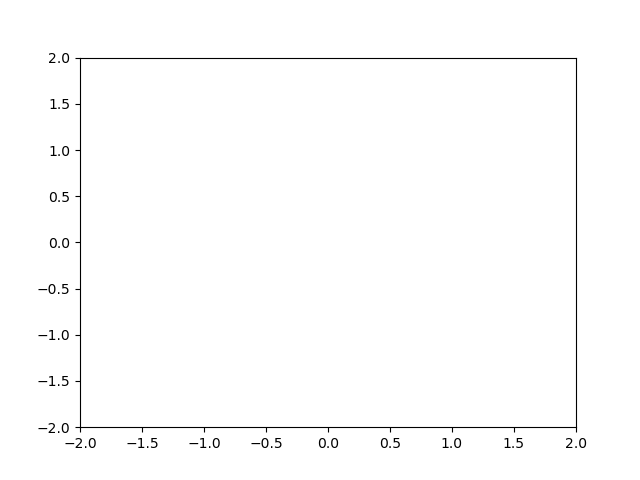

In [24]:
plt.close()
fig = plt.figure()
axis = plt.axes(xlim = (-2,2),
                ylim = (-2,2))

line, = axis.plot([],[], lw=2)

def init():
    line.set_data([],[])
    return line,

xdata, ydata = [], []

In [25]:
def findingVertices(n):
    vertX = []
    vertY = []

    vertX.append(1)
    vertY.append(0)

    baseAngle = np.pi*2/n
    for i in range (1,n):
        x = np.cos(baseAngle*i)
        y = np.sin(baseAngle*i)
        vertX.append(x)
        vertY.append(y)
    
    vertX.append(1)
    vertY.append(0)

    # print(vertX)
    # print(vertY)

    # line.set_data(vertX, vertY)
    # return line,
    return vertX, vertY 

In [26]:
points = []
# for i in range(3,9):
#     points.append([])

#Here 5 was there instead of 8
for i in range(3,10):
    X,Y = findingVertices(i)
    points.append([])
    points[i-3].append(X)
    points[i-3].append(Y)

for i in points:
    print(i)

[[1, -0.4999999999999998, -0.5000000000000004, 1], [0, 0.8660254037844387, -0.8660254037844385, 0]]
[[1, 6.123233995736766e-17, -1.0, -1.8369701987210297e-16, 1], [0, 1.0, 1.2246467991473532e-16, -1.0, 0]]
[[1, 0.30901699437494745, -0.8090169943749473, -0.8090169943749475, 0.30901699437494723, 1], [0, 0.9510565162951535, 0.5877852522924732, -0.587785252292473, -0.9510565162951536, 0]]
[[1, 0.5000000000000001, -0.4999999999999998, -1.0, -0.5000000000000004, 0.49999999999999933, 1], [0, 0.8660254037844386, 0.8660254037844387, 1.2246467991473532e-16, -0.8660254037844385, -0.866025403784439, 0]]
[[1, 0.6234898018587336, -0.22252093395631434, -0.900968867902419, -0.9009688679024191, -0.2225209339563146, 0.6234898018587334, 1], [0, 0.7818314824680298, 0.9749279121818236, 0.43388373911755823, -0.433883739117558, -0.9749279121818236, -0.7818314824680299, 0]]
[[1, 0.7071067811865476, 6.123233995736766e-17, -0.7071067811865475, -1.0, -0.7071067811865477, -1.8369701987210297e-16, 0.70710678118654

In [27]:
finalPoints = []

# Here it was 8
for i in range(3,10):
    X = points[i-3][0]
    Y = points[i-3][1]
    

    finalPoints.append([])
    finalPoints[(i-3)*20].append(X)
    finalPoints[(i-3)*20].append(Y)
    # print(finalPoints)

    next = []
    same = []

    # Here it was 7
    if(i!=9):
        for j in range (len(X)-1):
            m1 = (Y[j]-Y[j+1]) / (X[j]-X[j+1])
            c1 = Y[j] - m1 * X[j]

            m2 = points[i-2][1][j+1] / points[i-2][0][j+1]
            A = np.array([[-m1,1],[-m2,1]])
            B = np.array([c1,0])

            poi = np.linalg.solve(A,B)
            next.append(poi)

        for j in range (len(X)-2):
            m1 = (points[i-2][1][j+1]-points[i-2][1][j+2]) / (points[i-2][0][j+1]-points[i-2][0][j+2])
            c1 = points[i-2][1][j+1] - m1 * points[i-2][0][j+1]

            m2 = points[i-3][1][j+1] / points[i-3][0][j+1]
            A = np.array([[-m1,1],[-m2,1]])
            B = np.array([c1,0])

            poi = np.linalg.solve(A,B)
            same.append(poi)
        
        for j in range (1,20):
            finalPoints.append([])
            newX = []
            newY = []
            newX.append(1)
            newY.append(0)
            for k in range (len(X)-1):
                x = next[k][0]*(20-j) + points[i-2][0][k+1]*j
                x=x/20 
                y = next[k][1]*(20-j) + points[i-2][1][k+1]*j 
                y=y/20

                newX.append(x)
                newY.append(y)

                if(k!=len(X)-2):
                    x1 = same[k][0]*(j) + points[i-3][0][k+1]*(20-j) 
                    x1=x1/20
                    y1 = same[k][1]*(j) + points[i-3][1][k+1]*(20-j) 
                    y1=y1/20
                    newX.append(x1)
                    newY.append(y1)
            
            newX.append(1)
            newY.append(0)

            finalPoints[(i-3)*20+j].append(newX)
            finalPoints[(i-3)*20+j].append(newY)
    
    # print(next)
    # print(same)


print(len(finalPoints))





121


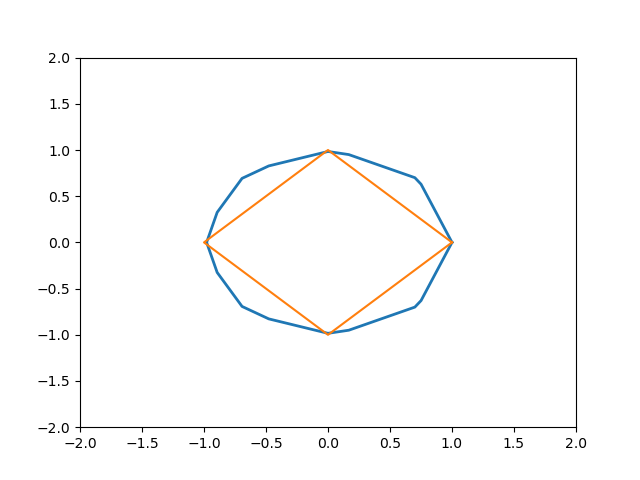

In [28]:
plt.plot(finalPoints[20][0], finalPoints[20][1])
plt.show()

In [29]:
for i in range (120,-1,-1):
    finalPoints.append(finalPoints[i])

len(finalPoints)

242

In [30]:
def update(i):
    line.set_data(finalPoints[i][0], finalPoints[i][1])
    return line,

In [31]:
for i in finalPoints:
    print(i)

[[1, -0.4999999999999998, -0.5000000000000004, 1], [0, 0.8660254037844387, -0.8660254037844385, 0]]
[[1, 3.664649955749044e-17, -0.49330127018922176, -0.5250000000000001, -0.49330127018922243, -1.0993949867247128e-16, 1], [0, 0.5984827557301445, 0.8544228634059949, 6.429395695523606e-17, -0.8544228634059946, -0.5984827557301443, 0]]
[[1, 3.7940491157483975e-17, -0.48660254037844364, -0.55, -0.4866025403784443, -1.1382147347245189e-16, 1], [0, 0.6196152422706633, 0.8428203230275508, 6.735557395310444e-17, -0.8428203230275507, -0.619615242270663, 0]]
[[1, 3.923448275747751e-17, -0.4799038105676656, -0.5750000000000001, -0.4799038105676662, -1.1770344827243252e-16, 1], [0, 0.640747728811182, 0.8312177826491072, 7.041719095097281e-17, -0.831217782649107, -0.6407477288111818, 0]]
[[1, 4.0528474357471054e-17, -0.4732050807568875, -0.6000000000000001, -0.4732050807568881, -1.215854230724131e-16, 1], [0, 0.6618802153517007, 0.8196152422706632, 7.34788079488412e-17, -0.8196152422706631, -0.6618

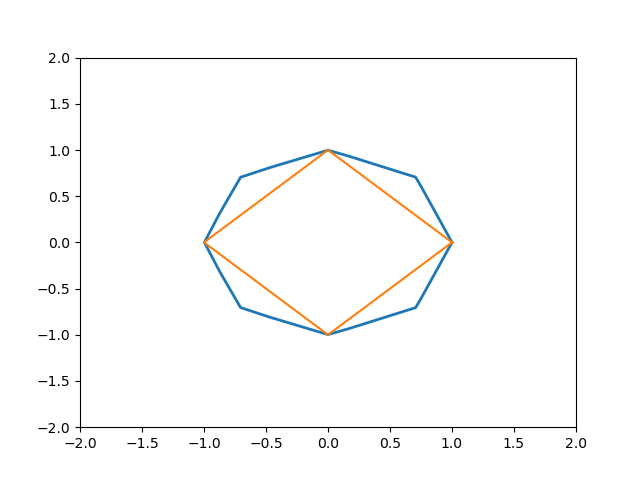

In [32]:
anim = FuncAnimation(fig,update,
                     init_func=init,
                     frames = 242,
                     interval = 100,
                     blit = False,
                     repeat = True)

plt.show()

In [33]:
len(finalPoints)

242